### 데이터 읽어서, 전처리, 상관분석, Heatmap Example

In [12]:
## 경고 메세지 표시 안하기
import warnings
warnings.filterwarnings(action='ignore')

### mpg dataset 이용

In [13]:
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
plt.rc('font', family='malgun gothic')
plt.rcParams['axes.unicode_minus'] = False

In [57]:
mpg_data = sns.load_dataset('mpg')
mpg_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [58]:
mpg_data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [59]:
mpg_data.isnull().sum() #결측값 확인

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

In [60]:
mpg_data['horsepower'].value_counts()

horsepower
150.0    22
90.0     20
88.0     19
110.0    18
100.0    17
         ..
61.0      1
93.0      1
148.0     1
152.0     1
82.0      1
Name: count, Length: 93, dtype: int64

In [61]:
mpg_data['horsepower'] = mpg_data['horsepower'].fillna(mpg_data['horsepower'].mean())

In [62]:
mpg_data.isnull().sum() #결측값 확인

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

In [63]:
mpg_data['horsepower'].value_counts()

horsepower
150.0    22
90.0     20
88.0     19
110.0    18
100.0    17
         ..
61.0      1
93.0      1
148.0     1
152.0     1
82.0      1
Name: count, Length: 94, dtype: int64

In [64]:
mpg_data['origin_encoded'] = mpg_data['origin'].map({'usa' : 0, 'europe' : 1, 'japan' : 2})

In [65]:
# def category_age(x):
#     if x = 'usa':    
#         return 0
#     elif x == 'europe' :
#         return 1
#     else:
#         return 2
    
# mpg_data['origin2'] = mpg_data['origin'].apply(category_age)

In [66]:
mpg_data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,origin_encoded
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu,0
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320,0
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite,0
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst,0
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino,0


In [67]:
subset = mpg_data[['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year', 'origin_encoded']]

In [68]:
subset.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin_encoded
0,18.0,8,307.0,130.0,3504,12.0,70,0
1,15.0,8,350.0,165.0,3693,11.5,70,0
2,18.0,8,318.0,150.0,3436,11.0,70,0
3,16.0,8,304.0,150.0,3433,12.0,70,0
4,17.0,8,302.0,140.0,3449,10.5,70,0


In [72]:
# mpg 제거하고, 나머지 Data 표준화 ( axis = 1 : 열단위로)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
subset_st = scaler.fit_transform(subset.drop(['mpg'], axis = 1))
subset_st

array([[ 1.49819126,  1.0906037 ,  0.66919608, ..., -1.29549834,
        -1.62742629, -0.71514478],
       [ 1.49819126,  1.5035143 ,  1.58659918, ..., -1.47703779,
        -1.62742629, -0.71514478],
       [ 1.49819126,  1.19623199,  1.19342642, ..., -1.65857724,
        -1.62742629, -0.71514478],
       ...,
       [-0.85632057, -0.56103873, -0.53653371, ..., -1.4407299 ,
         1.62198339, -0.71514478],
       [-0.85632057, -0.70507731, -0.66759129, ...,  1.10082237,
         1.62198339, -0.71514478],
       [-0.85632057, -0.71467988, -0.58895674, ...,  1.39128549,
         1.62198339, -0.71514478]])

In [73]:
subset_st_df = pd.DataFrame(subset_st, columns=subset.columns[1:])
subset_st_df

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin_encoded
0,1.498191,1.090604,0.669196,0.630870,-1.295498,-1.627426,-0.715145
1,1.498191,1.503514,1.586599,0.854333,-1.477038,-1.627426,-0.715145
2,1.498191,1.196232,1.193426,0.550470,-1.658577,-1.627426,-0.715145
3,1.498191,1.061796,1.193426,0.546923,-1.295498,-1.627426,-0.715145
4,1.498191,1.042591,0.931311,0.565841,-1.840117,-1.627426,-0.715145
...,...,...,...,...,...,...,...
393,-0.856321,-0.513026,-0.484111,-0.213324,0.011586,1.621983,-0.715145
394,-0.856321,-0.925936,-1.375302,-0.993671,3.279296,1.621983,0.533222
395,-0.856321,-0.561039,-0.536534,-0.798585,-1.440730,1.621983,-0.715145
396,-0.856321,-0.705077,-0.667591,-0.408411,1.100822,1.621983,-0.715145


### 상관 분석

In [75]:
corr_matrix = subset_st_df.corr()
corr_matrix

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin_encoded
cylinders,1.000000,0.950721,0.838939,0.896017,-0.505419,-0.348746,-0.562543
displacement,0.950721,1.000000,0.893646,0.932824,-0.543684,-0.370164,-0.609409
horsepower,0.838939,0.893646,1.000000,0.860574,-0.684259,-0.411651,-0.453669
weight,0.896017,0.932824,0.860574,1.000000,-0.417457,-0.306564,-0.581024
acceleration,-0.505419,-0.543684,-0.684259,-0.417457,1.000000,0.288137,0.205873
model_year,-0.348746,-0.370164,-0.411651,-0.306564,0.288137,1.000000,0.180662
origin_encoded,-0.562543,-0.609409,-0.453669,-0.581024,0.205873,0.180662,1.000000


In [76]:
heatmap_data = subset_st_df[['cylinders','displacement','horsepower','weight','acceleration','model_year','origin_encoded']]

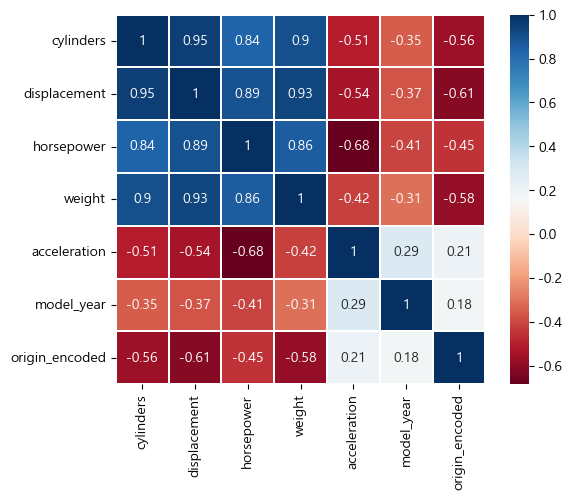

In [77]:
sns.heatmap(heatmap_data.astype(float).corr(), linewidths = 0.1, square = True, cmap='RdBu', linecolor='white', annot=True)
plt.show()

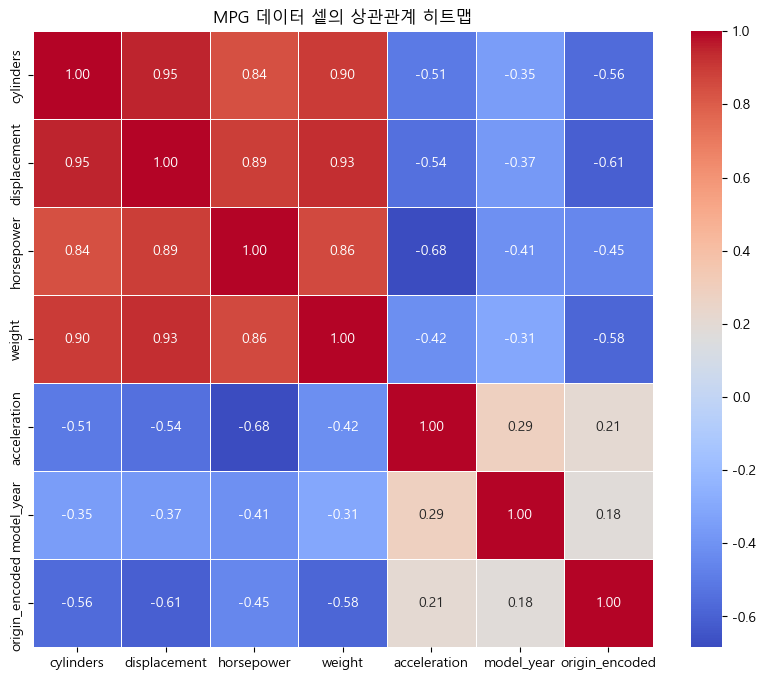

In [78]:
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot = True, cmap = 'coolwarm', fmt = ".2f", linewidths=.5)
plt.title('MPG 데이터 셑의 상관관계 히트맵')
plt.show()          